<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/HW3_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 score: 0.6823529411764706


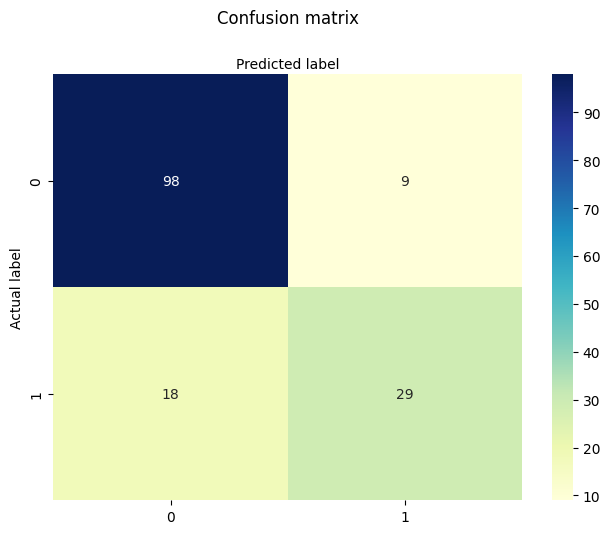

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1) Load the dataset you provided
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
df = pd.read_csv(url)
df.head()

# 2) Prepare X (features) and Y (target)
#    Use 'Outcome' if present (common for Pima dataset); otherwise use the last column as target.
target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
X = df.drop(columns=[target_col]).values
Y = df[target_col].values

# 3) Train / test split (80/20) — same style as your code
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0
)

# 4) Feature scaling (fit on train, transform train+test)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)

# 5) Logistic Regression (same style as your code)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

# 6) Predictions
Y_pred = classifier.predict(X_test)

# 7) Metrics: accuracy, precision, recall, F1
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix

print("Accuracy:",  metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:",    metrics.recall_score(Y_test, Y_pred))
print("F1 score:",  f1_score(Y_test, Y_pred))

# 8) Confusion Matrix (heatmap)
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[0, 1])

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
